In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [20]:
df = pd.read_csv("../data/raw/winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#checking shape
df.shape

(4898, 12)

In [4]:
#checking datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
#checking anomalies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#checking unique values in target column
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

# Quick EDA

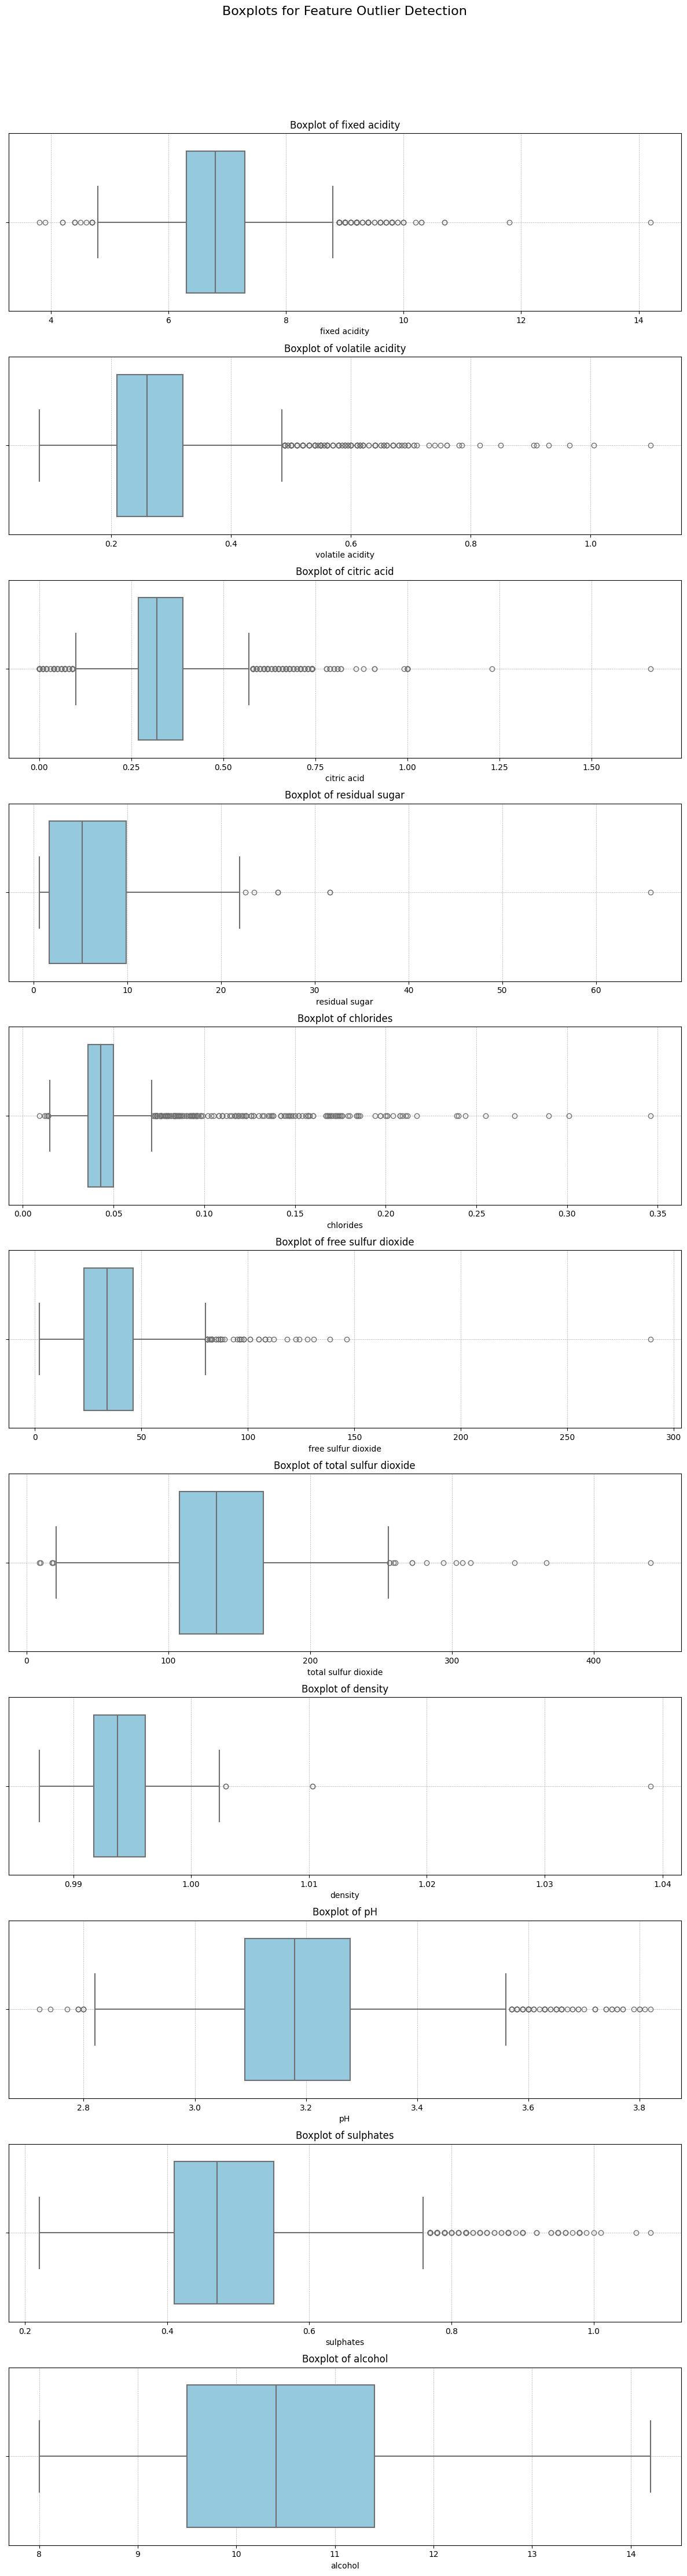

In [9]:

# Exclude the target column 'quality'
features = df.columns.drop('quality')

# Set up the figure
plt.figure(figsize=(12, len(features) * 4))  # Adjust height based on number of features

# Loop through features to plot one boxplot per row
for i, col in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[col], color='skyblue', linewidth=1.5)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle("Boxplots for Feature Outlier Detection", fontsize=16, y=1.01)
plt.tight_layout()
plt.subplots_adjust(top=0.96)  # Add spacing for suptitle
plt.show()

 # Observations on Outliers:
-> Residual sugar and free sulfur dioxide have many high-end outliers.

-> Chlorides, total sulfur dioxide, and alcohol also show upper outliers.

-> pH, citric acid, and volatile acidity have mild outliers but relatively more symmetric distributions.

-> Density appears tightly distributed but still has outliers on both ends.

In [4]:
skew_values = df.skew().sort_values(ascending=False)
print(skew_values)


chlorides               5.023331
volatile acidity        1.576980
free sulfur dioxide     1.406745
citric acid             1.281920
residual sugar          1.077094
density                 0.977773
sulphates               0.977194
fixed acidity           0.647751
alcohol                 0.487342
pH                      0.457783
total sulfur dioxide    0.390710
quality                 0.155796
dtype: float64


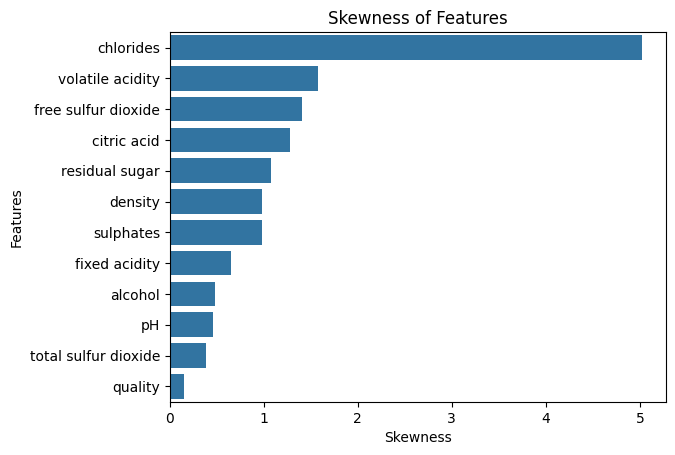

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=skew_values.values, y=skew_values.index)
plt.title("Skewness of Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.show()


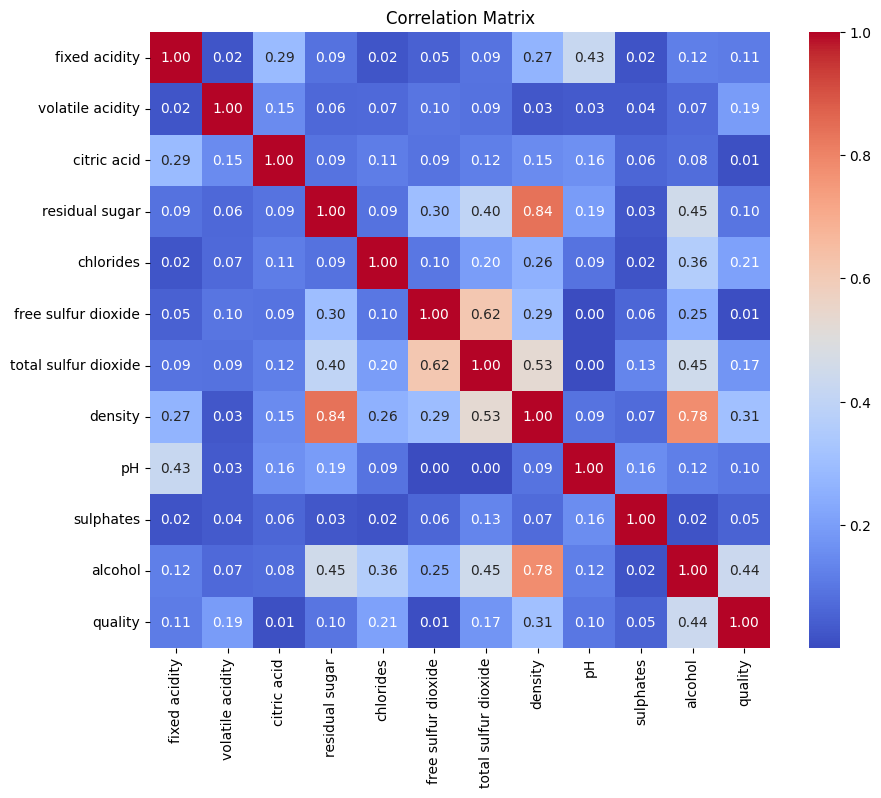

In [23]:
# Step 2: Calculate the correlation matrix
correlation_matrix = np.abs(df.corr())

# Step 3: Plot the matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Correlation with 'quality':

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


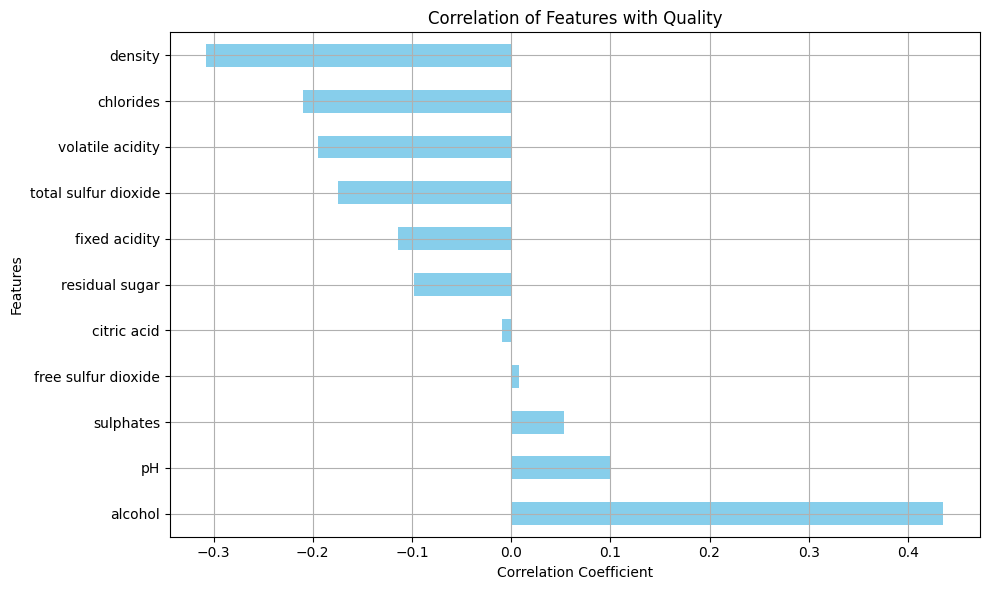

In [11]:


# Compute correlation of all features with 'quality'
correlation = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)

# Print correlation values
print("Correlation with 'quality':\n")
print(correlation)

# Plot the correlation values as a horizontal bar plot
plt.figure(figsize=(10, 6))
correlation.drop('quality').plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with Quality")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()


# Correlation values from the bar plot:

Strongest positive correlation:

alcohol (0.44) — higher alcohol tends to be associated with better quality.

Moderate negative correlations:

density (-0.31)

chlorides (-0.21)

volatile acidity (-0.19)

total sulfur dioxide (-0.17)

These features may have more linear impact on the target quality.